### Bonjour, on se propose dans ce Notebook de faire une analyse descriptive d'un jeu de données relatif à des patients qui sont malades de *bactérémie*, ou bien sont en bonne santé. ###
Le bactérémie est l'état dans lequel un pathogène a gagné le sang, c'est très dangereux, ça peut être fatal. 
Les variables qu'on a pour les patients sont différentes mesures effectuées à partir d'**examens du sang**. 



données dispo ici : https://zenodo.org/records/7554815#.ZF-dztLMK-Y

In [1]:
import pandas as pd
import numpy as np
import random

from utils import compteur_nan, affecter_nan, colonnes_nan, moyenne_agg, show_argv_path, var_interest

from random import sample

In [2]:
show_argv_path()

le répertoire courant est /home/zuko/envi
le point d'entrée du programme est /home/zuko/envi/lib/python3.11/site-packages/ipykernel_launcher.py
la variable sys.path contient
1-ème chemin dans sys.path /usr/lib/python311.zip
2-ème chemin dans sys.path /usr/lib/python3.11
3-ème chemin dans sys.path /usr/lib/python3.11/lib-dynload
4-ème chemin dans sys.path 
5-ème chemin dans sys.path /home/zuko/envi/lib/python3.11/site-packages


In [3]:
#from pathlib import Path
#Path.cwd()
#vars(spam) 

In [4]:
frame = pd.read_csv("/home/zuko/Téléchargements/Bacteremia_public_S2.csv", index_col='ID')
frame[:5].T

ID,1,3,5,7,9
SEX,2,1,1,1,2
AGE,62,72,46,84,38
MCV,99.3,85.1,96.3,91.3,85.1
HGB,11.5,10.3,7.4,10.3,13.7
HCT,35.9,34.7,22.8,31.1,38.7
PLT,307.0,182.0,64.0,309.0,183.0
MCH,31.5,26.0,31.2,30.4,30.2
MCHC,31.8,30.6,32.4,33.3,35.3
RDW,19.5,15.0,19.7,13.8,12.6
MPV,10.8,9.7,11.1,8.5,10.0


In [5]:
frame.shape # on a > 14000 ind! 

(14691, 52)

In [6]:
frame.sort_index(inplace=True) #améliore la perf et permet gérer eventuelles erreurs si des ind dupliqués

In [7]:
# quelles colonnes ont bcp de nan?
list(colonnes_nan(frame, 200))[:3] #2eme argument est seuil de Nan au dessus duquel on ajoute dans liste
len(list(colonnes_nan(frame, 200)))

37

In [8]:
# quelles colonnes ont bcp de nan? même chose mais syntaxe différente
l = ((col, frame[col].isnull().sum()) for col in frame.columns if frame[col].isnull().sum() > 200)
#%timeit list(l)
print(list(l)[:3])
del l

[('MPV', 702), ('LYM', 262), ('MONO', 246)]


In [9]:
len(list(colonnes_nan(frame, 1000)))
list(colonnes_nan(frame, 1000))

[('NT', 2467),
 ('APTT', 2549),
 ('FIB', 2567),
 ('SODIUM', 1282),
 ('POTASS', 2008),
 ('CA', 1276),
 ('PHOS', 1242),
 ('MG', 1869),
 ('HS', 3061),
 ('GBIL', 1441),
 ('TP', 1583),
 ('ALB', 1676),
 ('AMY', 3913),
 ('PAMY', 7114),
 ('LIP', 3699),
 ('CHE', 2447),
 ('AP', 1400),
 ('ASAT', 1154),
 ('GGT', 1262),
 ('LDH', 1714),
 ('CK', 2080),
 ('GLU', 4192),
 ('TRIG', 5061),
 ('CHOL', 5045),
 ('PDW', 1102)]

In [10]:
#frame.map(lambda x : pd.isna(x)).sum(axis=1)
count = 0 #how many rows have NAN?
for i in frame.isnull().sum(axis=1):
    if i > 0:
        count += 1
print(count)
del count

10712


In [11]:
bact = frame.loc[frame.loc[:, 'BloodCulture' ] == 'yes'].index
no_bact = frame.loc[~(frame.loc[:, 'BloodCulture' ] == 'yes')].index

frame.drop(index = [ind for ind in compteur_nan(frame.loc[no_bact], 5)], inplace = True)
frame.drop(index = [ind for ind in compteur_nan(frame.loc[bact], 7)], inplace = True)
#test que ca a marché
print(f"{len(list(compteur_nan(frame, 7)))} lignes avec plus de 7 NAN")

0 lignes avec plus de 7 NAN


In [12]:
#long = len(list(compteur_nan(table))) # len de liste lignes ayant 0 >= NAN > 8
k = 3 #on tire k individu
choice = random.sample(list(compteur_nan(frame)), k) #on tire k ind au hasard parmi nos individus qui ont des NAN mais < 8
print(f"on tire {choice} ind parmi ind qui ont des NAN<8, la liste fait {len(list(compteur_nan(frame)))} lignes")
res = frame.loc[choice].T
res

on tire [10721, 35644, 40695] ind parmi ind qui ont des NAN<8, la liste fait 6204 lignes


ID,10721,35644,40695
SEX,2,1,1
AGE,20,75,63
MCV,88.7,78.3,79.7
HGB,13.9,12.4,10.1
HCT,42.2,35.8,28.9
PLT,230.0,126.0,165.0
MCH,28.9,26.6,27.9
MCHC,32.4,34.3,34.5
RDW,13.0,15.5,16.3
MPV,10.3,11.5,12.4


We <mark>drop variables</mark> which are measured **ratios** derived from or heavily linked with other **base measures**, that includes HCT which is a volume rate relative to blood volume of Red Bloood Cells which are on the hand measured more directly by variable RBC : Red Blood Count. The latter variable is kept while HCT is excluded as ***redundant*** information. 
\nsame logic with WBC which includes aggregate information from other variables : BASO, EOS, LYM, NEU

In [13]:
l_rates = [i for i in frame.columns if i[-1] == 'R'] #si colonne finit par R on recupère
for i in l_rates: 
    if i[:-1] not in frame.columns:
       print(f"{i} n'a pas de correspondant brut") 
    else:
        print(f"{i} possede un correspondant")

frame.drop(columns = l_rates+['WBC', 'HCT'], inplace = True) #on supprimme les colonnes qui sont derivées d'autres variables
del l_rates

BASOR possede un correspondant
EOSR possede un correspondant
LYMR possede un correspondant
MONOR possede un correspondant
NEUR possede un correspondant


In [14]:
%timeit affecter_nan(frame) #affectation par la moyenne

3.22 ms ± 328 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
len(list(compteur_nan(frame))) #test s'il reste des lignes qui ont des Nan

0

In [ ]:
#X = np.linspace(0., 10., 50) array plus rapide que listes, linspace : creer array avec (borne, borne incluse, nb de pts)
#out_data = (une_fonction(x) for x in in_data)

En fait en numpy on passe son temps à écrire des expressions dont les éléments sont des tableaux, et cela produit des opérations membre à membre, comme on vient de le voir avec cosinus.

In [ ]:
# l'énorme majorité du temps, on écrit avec numpy
# des expressions qui impliquent des tableaux
# exactement comme si c'était des nombres

In [ ]:
#np.all(a == b) vérifier que tous les éléments du tableau sont vrais

on utilise plutôt les tableaux logiques comme des masques, pour faire ou non des opérations sur un autre tableau

In [ ]:
#table.groupby('BloodCulture', observed=True).mean(numeric_only=True).T[:7]

In [ ]:
#table.loc[:, 'globules'].mean()
#lignes = table.loc[:, 'sex'] == 'M'
#table.loc[lignes, 'globules'].mean()

In [ ]:
# quels sont les taux de lymphocytes selon malade/ sain et selon sexe? (1=male)
#table.pivot_table('LYM',
                  #aggfunc = 'mean',
                  #index = 'BloodCulture',
                  #columns = 'SEX'
                 #)

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca_frame = frame.copy().drop(columns = ['SEX', 'BloodCulture'])# pourquoi drop age?
data = pca_frame.values
scaler = StandardScaler()
scaled_data = scaler.fit(data)
scaled_data = scaler.transform(data)
pca = PCA()
pca_res = pca.fit(scaled_data) #resultats de ACP

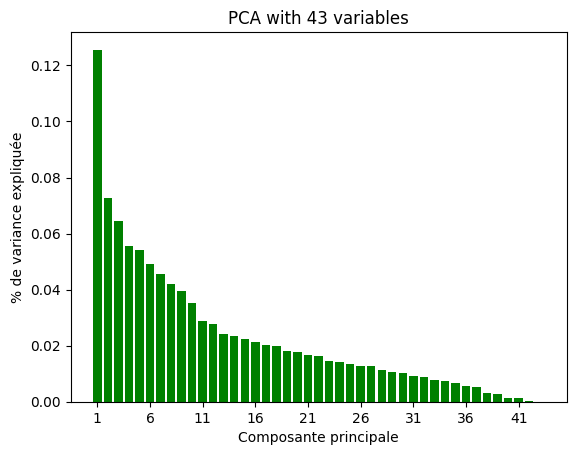

In [17]:
import matplotlib.pyplot as plt
ratios = pca.explained_variance_ratio_#[:25]

plt.bar(np.arange(1,len(ratios)+1), ratios, color='green')
plt.xticks(np.arange(1,len(ratios)+1, 5), np.arange(1, len(ratios)+1, 5))
plt.xlabel("Composante principale")
plt.ylabel("% de variance expliquée")
plt.title(f"PCA with {data.shape[-1]} variables");
#plt.savefig("ebouli_pca_44")

critère de Kayser : interpréter seulement axes dont lambda >= 1 = variance d'une seule var du jeu données initial

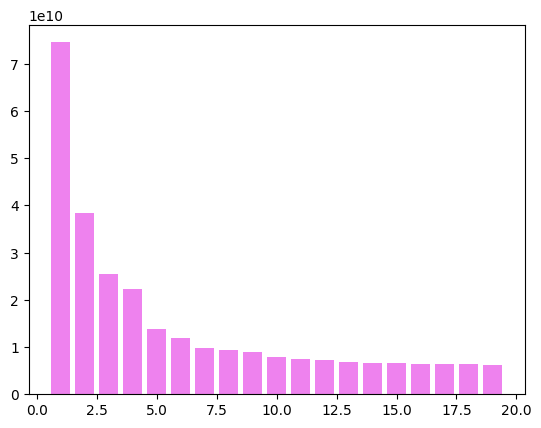

In [18]:
from sklearn.cluster import KMeans

array = []
for i in range(1,20):
    kmeans_i = KMeans(n_clusters=i, n_init=1, init='random').fit(data)
    inertie = kmeans_i.inertia_
    array.append(inertie)
plt.bar(range(1,20), array, color='violet');

In [19]:
kmeans = KMeans(n_clusters=3, n_init=1, init='k-means++').fit(data)
pred = kmeans.predict(data)

/tmp/ipykernel_68043/403860278.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ax.scatter(comp[:,0], comp[:,1], comp[:,2], c=frame.loc[:,'BloodCulture'].replace(dico), marker=".", alpha=0.6)#c=pred


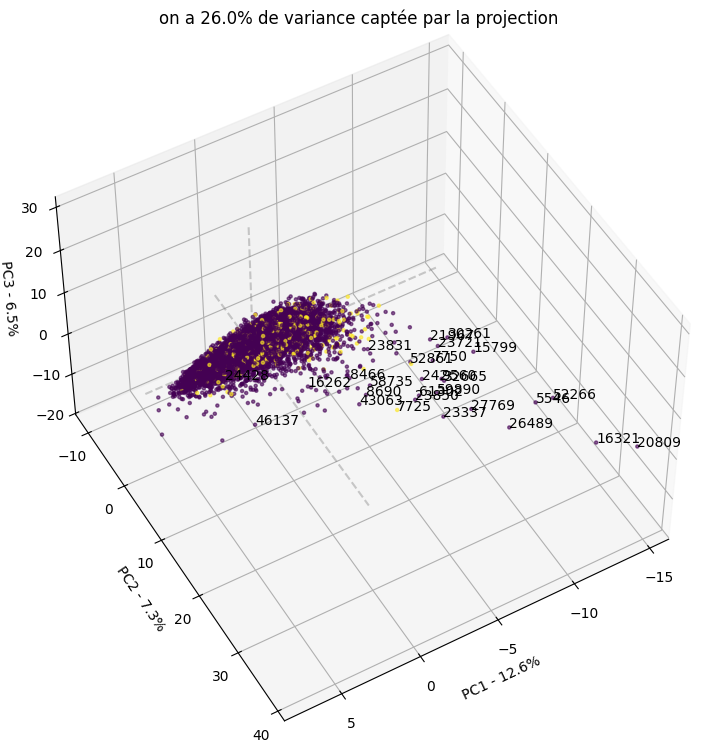

In [20]:
comp = pca_res.transform(scaled_data)

liste_outliers = [] #on fait une liste pour les outliers

fig = plt.figure(figsize=(9, 12))
ax = fig.add_subplot(111, projection='3d', elev=50, azim=60)

# La couleur des points dépend de leur étiquette 
ax.plot(np.arange(-12, 7.5),0, 0, linestyle='dashed', c='grey', alpha=0.4)
ax.plot(0,np.arange(-10, 30), 0, linestyle='dashed', c='grey', alpha=0.4)
ax.plot(0, 0, np.arange(-5, 30), linestyle='dashed', c='grey', alpha=0.4)

dico = {'yes':1, 'no':0} #faisons dict

ax.scatter(comp[:,0], comp[:,1], comp[:,2], c=frame.loc[:,'BloodCulture'].replace(dico), marker=".", alpha=0.6)#c=pred

ax.set_xlabel(f"PC1 - {100*pca_res.explained_variance_ratio_[0]:.1f}%")
ax.set_ylabel(f"PC2 - {100*pca_res.explained_variance_ratio_[1]:.1f}%")
ax.set_zlabel(f"PC3 - {100*pca_res.explained_variance_ratio_[2]:.1f}%")

for i in np.arange(0, comp.shape[0]): #this part is based on a stackoverflow discussion
    if np.linalg.norm(comp[i,:4]) > 14: #ind qui plus long vecteur dans ss espace defini par PC1, PC2, PC3
        ax.text(comp[i,0], comp[i,1], comp[i,2], s=pca_frame.index[i])
        liste_outliers.append(pca_frame.index[i])
ax.set_title(f"on a {np.round(np.sum(pca_res.explained_variance_ratio_[:3])*100)}% de variance captée par la projection");
#plt.savefig("PCA_20.png")

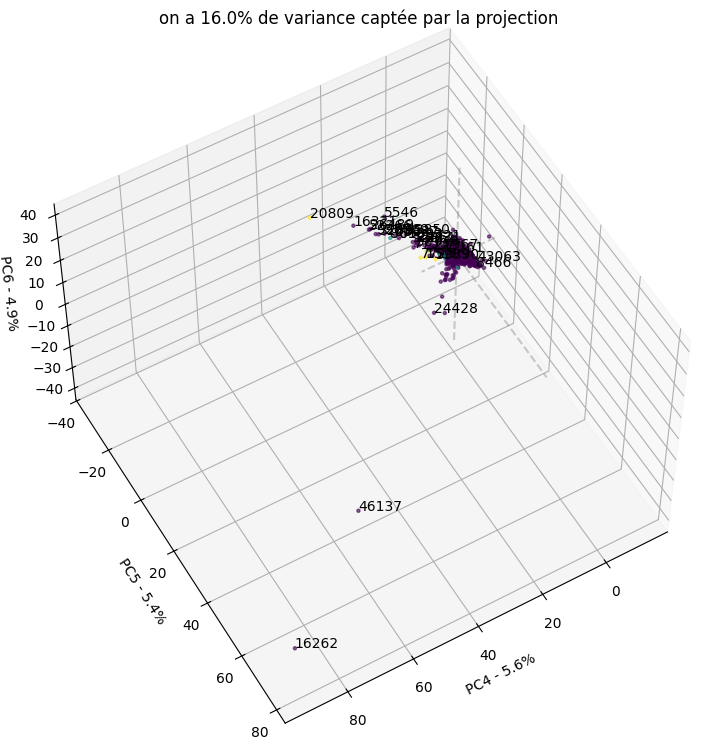

In [21]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(9, 12))
ax = fig.add_subplot(111, projection='3d', elev=55, azim=60)

ax.plot(np.arange(-12, 12),0, 0, linestyle='dashed', c='grey', alpha=0.4)
ax.plot(0,np.arange(-10, 50), 0, linestyle='dashed', c='grey', alpha=0.4)
ax.plot(0, 0, np.arange(-40, 40), linestyle='dashed', c='grey', alpha=0.4)

# La couleur des points dépend de leur étiquette 
ax.scatter(comp[:,3], comp[:,4], comp[:,5], c=pred, marker=".", alpha=0.6)#c=table['BloodCulture'].replace({'yes':1, 'no':0})
ax.set_xlabel(f"PC4 - {100*pca_res.explained_variance_ratio_[3]:.1f}%")
ax.set_ylabel(f"PC5 - {100*pca_res.explained_variance_ratio_[4]:.1f}%")
ax.set_zlabel(f"PC6 - {100*pca_res.explained_variance_ratio_[5]:.1f}%")
for i in np.arange(0, comp.shape[0]): 
    if np.linalg.norm(comp[i,:4]) > 14:
        #this part is based on a stackoverflow discussion
        ax.text(comp[i,3], comp[i,4], comp[i,5], s=pca_frame.index[i])
ax.set_title(f"on a {np.round(np.sum(pca_res.explained_variance_ratio_[3:6])*100)}% de variance captée par la projection");

In [22]:
#on compare moyenne des outliers par rapport à moyenne générale
out = pd.concat(
    [moyenne_agg(frame).to_frame(name='mean').T,
     moyenne_agg(frame.loc[liste_outliers].copy()).to_frame(name='mean_out').T]
).T
out #rq {'SEX': 1=male, 2=female}

,mean,mean_out
SEX,1.410193,1.357143
AGE,56.472945,53.25
MCV,88.482363,89.832143
HGB,11.623431,11.271429
PLT,224.139448,204.857143
MCH,29.624767,29.792857
MCHC,33.474988,33.15
RDW,14.938304,15.696429
MPV,10.406123,10.897085
LYM,1.225346,2.910714


In [23]:
list_mean = []
list_out = []
inde = []

for i in out.index:
    if i == 'AGE' \
    or i == 'SEX' \
    or out.loc[i, 'mean_out'] > 2*out.loc[i, 'mean'] \
    or 2*out.loc[i, 'mean_out'] < out.loc[i, 'mean']:
        list_mean.append(np.round(out.loc[i, 'mean'],2))
        list_out.append(np.round(out.loc[i, 'mean_out'],2))
        inde.append(i)

out_2 = pd.DataFrame({'mean' : list_mean, 'mean_out' : list_out}, index = inde)
out_2

,mean,mean_out
SEX,1.41,1.36
AGE,56.47,53.25
LYM,1.23,2.91
EOS,0.11,0.02
BASO,0.01,0.07
CREA,1.29,3.48
BUN,22.63,56.18
GBIL,1.40,4.08
AMY,88.97,3966.71
PAMY,41.96,1526.80


In [24]:
# ndarray of shape (n_components, n_features)
PCnames = ['PC'+str(i+1) for i in range(pca.n_components_)]
Loadings = pd.DataFrame(pca.components_,columns=pca_frame.columns,index=PCnames)

Loadings.iloc[:3]

,AGE,MCV,HGB,PLT,MCH,MCHC,RDW,MPV,LYM,MONO,...,GGT,LDH,CK,GLU,TRIG,CHOL,CRP,NEU,PDW,RBC
PC1,-0.142536,-0.075026,0.305678,0.069616,-0.011577,0.106863,-0.227443,-0.086607,0.039971,-0.051038,...,-0.100555,-0.113730,-0.051361,-0.020880,-0.029096,0.209901,-0.167414,-0.083480,-0.075034,0.304145
PC2,0.010512,0.123171,0.237777,-0.147320,0.147021,0.090107,-0.069250,0.249821,0.071042,0.038845,...,0.040681,0.322595,0.159739,0.086396,0.061292,0.083794,-0.091189,0.048796,0.255783,0.173308
PC3,-0.058817,0.282391,0.041259,-0.331336,0.387404,0.306046,-0.150312,0.167355,-0.079371,-0.148878,...,-0.028876,-0.020069,0.001881,-0.090705,-0.070045,-0.099313,-0.118932,-0.187150,0.127861,-0.123548


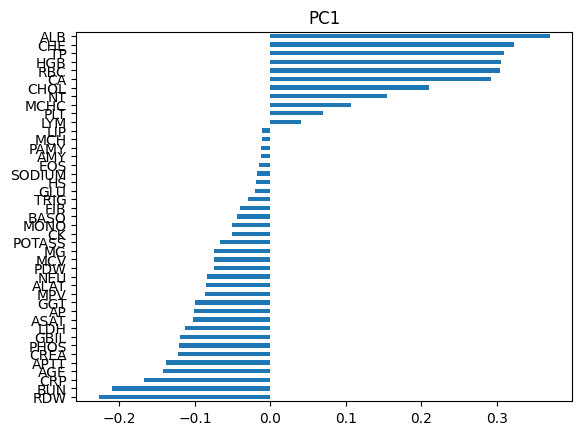

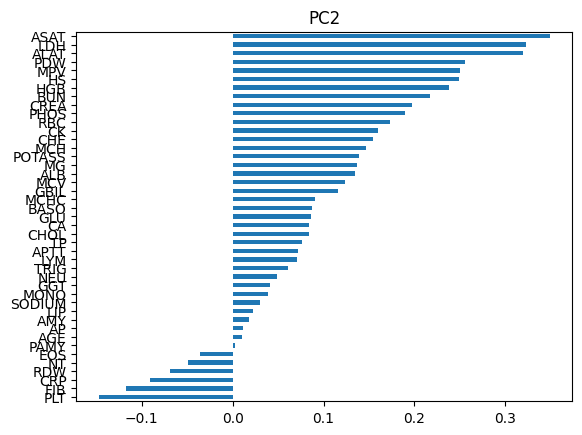

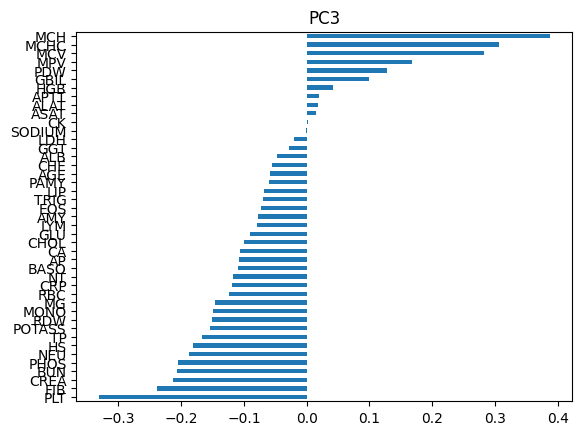

In [25]:
for i in Loadings.index[:3]:
    Loadings.loc[f"{i}"].sort_values().plot.barh()
    plt.title(f"{i}")
    #plt.savefig(f"coef_PCA_20.png")
    #break
    plt.show()

attribute of class pca \
components_ : ndarray of shape (n_components, n_features)

Principal axes in feature space, representing the directions of maximum variance in the data. Equivalently, the right singular vectors of the centered input data, parallel to its eigenvectors. The components are <mark>sorted by decreasing explained_variance_</mark>.

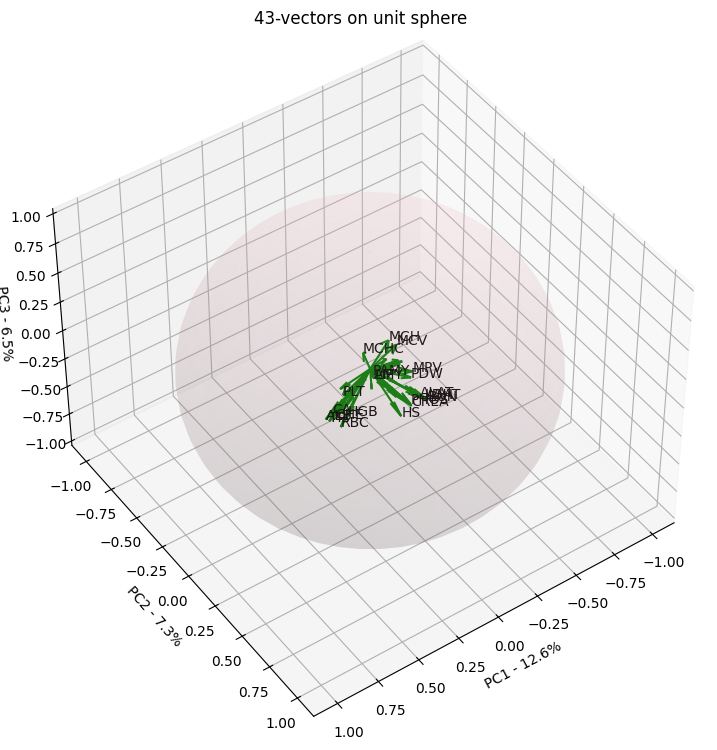

In [26]:
#sphere des correlations
fig = plt.figure(figsize=(9, 9))
#ax = fig.add_subplot(projection='3d')
ax = fig.add_subplot(111, projection='3d', elev=45, azim=55)
# draw sphere
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
# alpha controls opacity
ax.plot_surface(x, y, z, color="pink", alpha=0.1)


# a random array of 3D coordinates in [-1,1]

coef = np.transpose(pca.components_)
# tails of the arrows
tails= np.zeros(len(coef[1]))

# heads of the arrows with adjusted arrow head length
ax.quiver(tails,tails,tails,coef[:,0], coef[:,1], coef[:,2], color='g')

ax.set_xlabel(f"PC1 - {100*pca_res.explained_variance_ratio_[0]:.1f}%")
ax.set_ylabel(f"PC2 - {100*pca_res.explained_variance_ratio_[1]:.1f}%")
ax.set_zlabel(f"PC3 - {100*pca_res.explained_variance_ratio_[2]:.1f}%")

for r, i in enumerate(coef): #rank, iterated
    if np.linalg.norm(i[:4]) > 0.3: #on inclue la 4eme PC
        ax.text(coef[r,0], coef[r,1], coef[r,2], s=pca_frame.columns[r])
ax.set_title(f'{len(coef)}-vectors on unit sphere');

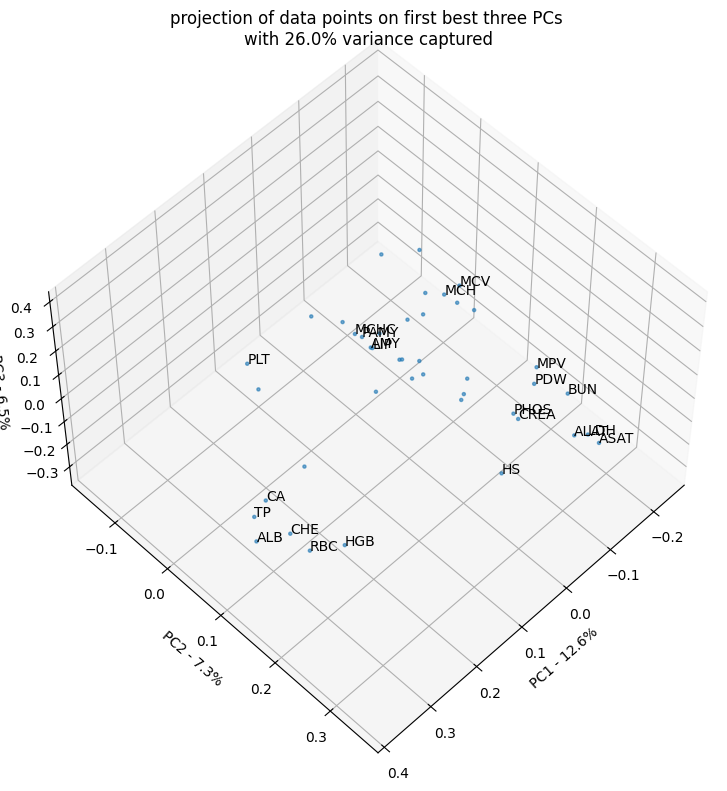

In [27]:
fig = plt.figure(figsize=(9, 12))
ax = fig.add_subplot(111, projection='3d', elev=55, azim=45)


ax.scatter(coef[:,0], coef[:,1], coef[:,2], marker=".", alpha=0.6)#c=table['BloodCulture'].replace({'yes':1, 'no':0})

ax.set_xlabel(f"PC1 - {100*pca_res.explained_variance_ratio_[0]:.1f}%")
ax.set_ylabel(f"PC2 - {100*pca_res.explained_variance_ratio_[1]:.1f}%")
ax.set_zlabel(f"PC3 - {100*pca_res.explained_variance_ratio_[2]:.1f}%")
for i in np.arange(0, coef.shape[0]): #this part is based on a stackoverflow discussion
    if np.linalg.norm(coef[i,:4]) > .3:
        ax.text(coef[i,0], coef[i,1], coef[i,2], s=pca_frame.columns[i])
ax.set_title(f'projection of data points on first best three PCs \
\nwith {np.round(np.sum(pca_res.explained_variance_ratio_[0:3]*100))}% variance captured');

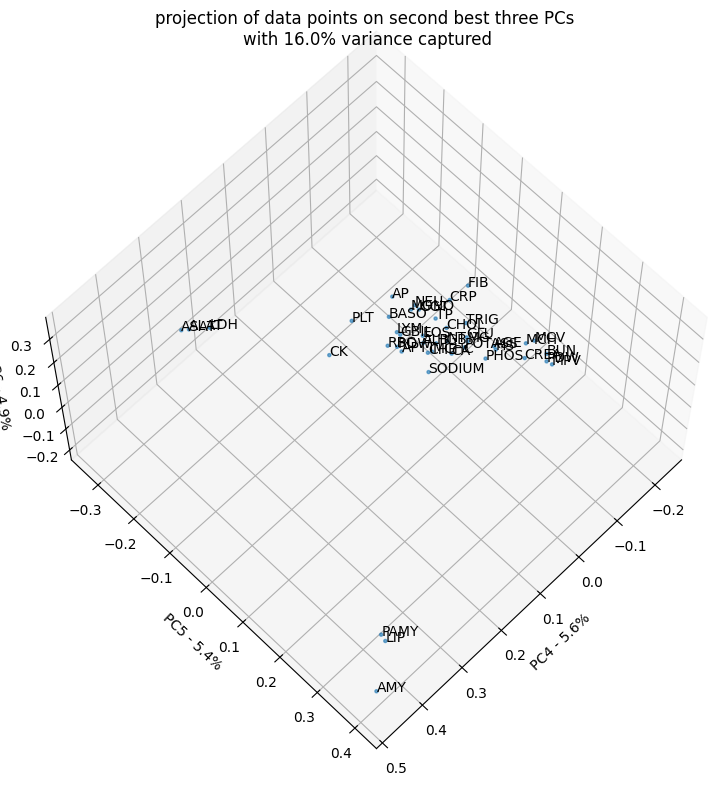

In [28]:
fig = plt.figure(figsize=(9, 12))
ax = fig.add_subplot(111, projection='3d', elev=65, azim=45)


ax.scatter(coef[:,3], coef[:,4], coef[:,5], marker=".", alpha=0.6)#c=table['BloodCulture'].replace({'yes':1, 'no':0})

ax.set_xlabel(f"PC4 - {100*pca_res.explained_variance_ratio_[3]:.1f}%")
ax.set_ylabel(f"PC5 - {100*pca_res.explained_variance_ratio_[4]:.1f}%")
ax.set_zlabel(f"PC6 - {100*pca_res.explained_variance_ratio_[5]:.1f}%")
for i in np.arange(0, coef.shape[0]): #this part is based on a stackoverflow discussion
    #if np.linalg.norm(coef[i,3:6]) > .3:
    ax.text(coef[i,3], coef[i,4], coef[i,5], s=pca_frame.columns[i])
ax.set_title(f'projection of data points on second best three PCs \
\nwith {np.round(np.sum(pca_res.explained_variance_ratio_[3:6]*100))}% variance captured');

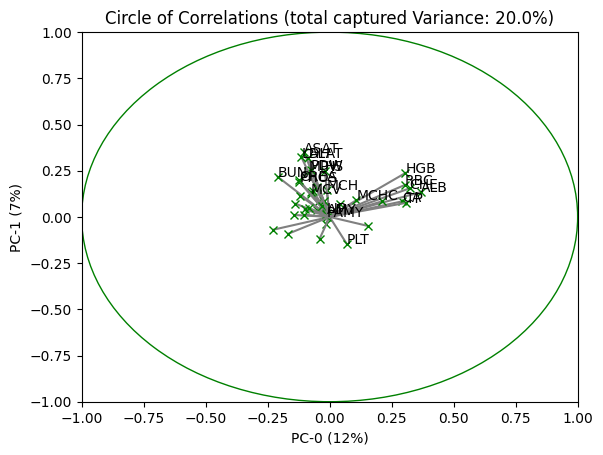

In [29]:
#df_norm = (df - df.mean()) / df.std()
# PCA
#pca = PCA(n_components='mle')

ebouli = pd.Series(pca.explained_variance_ratio_)
	
# Circle of correlations
# http://stackoverflow.com/a/22996786/1565438

cols = ['PC-'+str(x) for x in range(len(ebouli))]
pc_infos = pd.DataFrame(coef, columns=cols, index=pca_frame.columns)

#def circleOfCorrelations(pc_infos, ebouli):
plt.Circle((0,0),radius=10, color='g', fill=False)
circle1=plt.Circle((0,0),radius=1, color='g', fill=False)
fig = plt.gcf()
fig.gca().add_artist(circle1)
for idx in range(pc_infos.shape[0]):
	x = pc_infos.loc[pc_infos.index[idx],"PC-0"]
	y = pc_infos.loc[pc_infos.index[idx],"PC-1"]
	plt.plot([0.0,x],[0.0,y],'-', c='grey')
	plt.plot(x, y, 'x', c='g')
	if np.linalg.norm(coef[idx,:4]) > .3:
		plt.annotate(pc_infos.index[idx], xy=(x,y))
        
plt.xlabel("PC-0 (%s%%)" % str(ebouli[0])[:4].lstrip("0."))
plt.ylabel("PC-1 (%s%%)" % str(ebouli[1])[:4].lstrip("0."))
plt.xlim((-1,1))
plt.ylim((-1,1))
plt.title(f"Circle of Correlations (total captured Variance: {np.round(np.sum(ebouli[:2])*100)}%)");
#plt.savefig("circle_PCA_20.png")

In [31]:
#itère dans les variables
#var_interet = ((pca_frame.columns[rank], np.linalg.norm(i[:4])) for rank, i in enumerate(np.transpose(pca.components_)) if np.linalg.norm(i[:4]) > .2)
#len(list(variables_i))
liste_one = []
liste_two = []
for i, j in var_interest(pca, pca_frame, 4, .25):
    liste_one.append(i)
    liste_two.append(j)
pd.Series(liste_two, index=liste_one).sort_values(ascending= False)[:25]

AMY     0.471620
ASAT    0.452833
BUN     0.427278
ALAT    0.423414
MCH     0.422424
LDH     0.413917
LIP     0.404688
ALB     0.398049
PAMY    0.395524
HGB     0.390125
PLT     0.382299
CREA    0.375187
RBC     0.371415
TP      0.363378
CHE     0.362806
HS      0.347186
MPV     0.341940
MCHC    0.336497
MCV     0.332480
PHOS    0.331936
PDW     0.327710
CA      0.323670
RDW     0.281329
FIB     0.279171
dtype: float64

In [ ]:
#pd.Series(liste_two, index=liste_one).sort_values(ascending= False)[:20].to_csv('liste20var.csv')

In [32]:
liste_var = list(pd.Series(liste_two, index=liste_one).sort_values(ascending= False)[:20].index)
liste_var = liste_var + ['NEU']
#pca_df = table.loc[index_2, liste_index]
#pca_df = table.loc[:, liste_index].copy() # raffinage des variables

In [37]:
groupe_pos = frame.loc[frame.loc[:, 'BloodCulture' ] == 'yes'].index
groupe_neg = frame.loc[~(frame.loc[:, 'BloodCulture' ] == 'yes')].index

k = len(groupe_pos) #nb d'ind positifs à un pathogène
draw_neg = random.sample(list(groupe_neg), k) #choix de k ind neg

index_2 = list(groupe_pos) + draw_neg #shuffle?

In [38]:
frame.loc[index_2, liste_var].sample(3)

,AMY,ASAT,BUN,ALAT,MCH,LDH,LIP,ALB,PAMY,HGB,...,CREA,RBC,TP,CHE,HS,MPV,MCHC,MCV,PHOS,NEU
ID,,,,,,,,,,,,,,,,,,,,,
60284,37.0,70.0,31.0,14.0,31.8,396.0,4.0,32.4,8.0,12.3,...,1.28,3.9,68.1,3.02,5.2,10.0,33.5,95.4,0.82,10.0
17033,82.0,45.0,7.5,48.0,29.4,156.0,141.0,31.4,65.0,9.9,...,0.57,3.3,76.3,3.51,4.0,10.1,33.8,87.2,1.30,4.8
38707,81.0,46.0,13.5,26.0,32.5,285.0,27.0,39.6,39.0,15.7,...,1.01,4.9,72.4,6.97,6.7,9.3,35.2,92.1,0.95,7.5


In [39]:
liste_outliers

[242,
 5546,
 7725,
 7750,
 8466,
 8690,
 9560,
 15799,
 16262,
 16321,
 20809,
 21967,
 23337,
 23721,
 23831,
 23850,
 24428,
 26489,
 27769,
 30261,
 32665,
 43063,
 46137,
 52266,
 52861,
 58735,
 59890,
 61302]

In [40]:
recycle_bin = []
for r, i in enumerate(index_2):
    if i in liste_outliers:
        recycle_bin.append(i)
        index_2.pop(r)
recycle_bin

[7725, 52861, 30261, 32665, 58735]

In [41]:
for i in recycle_bin:
    if i in index_2:
        print("error")

In [42]:
final_columns = ['SEX'] + liste_var + ['BloodCulture']
frame2 = frame.loc[index_2].copy()
frame2.sort_index(inplace=True)
pca_frame2 = frame2.loc[:, final_columns].copy()
pca_frame2
pca_frame2.to_csv('pca_bact.csv')

In [43]:
pca_frame2 = pca_frame2.drop(columns = ['SEX', 'BloodCulture'])
data2 = pca_frame2.values
scaler2 = StandardScaler() #on reset un nvel instance
scaled_data2 = scaler2.fit(data2)
scaled_data2 = scaler2.transform(data2)
pca2 = PCA()
pca_res2 = pca2.fit(scaled_data2) #resultats de ACP

/tmp/ipykernel_68043/3687526612.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ax.scatter(comp[:,0], comp[:,1], comp[:,2], c=frame2.loc[:,'BloodCulture'].replace(dico), marker=".", alpha=0.6)#c=pred


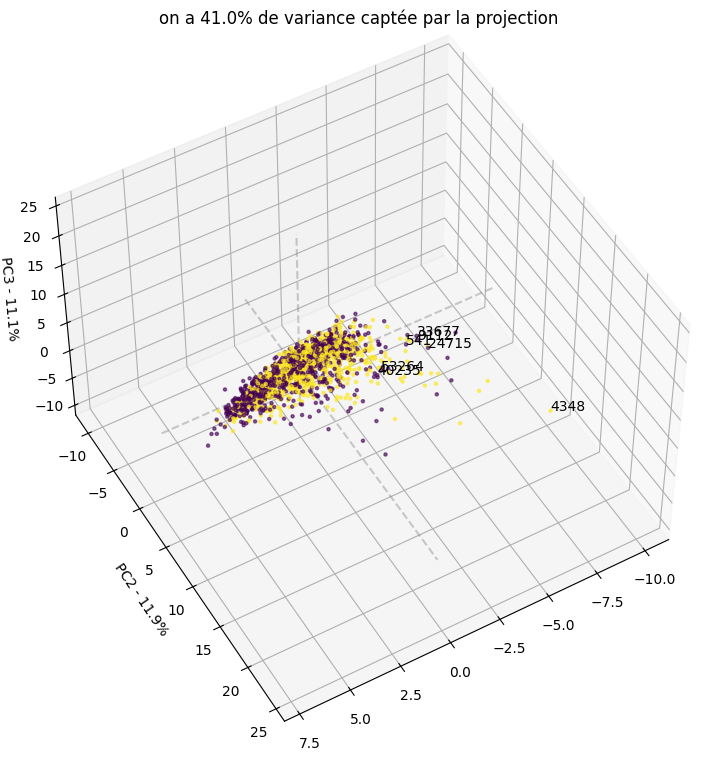

In [44]:
comp = pca_res2.transform(scaled_data2)

liste_out = [] #on fait une liste pour les outliers

fig = plt.figure(figsize=(9, 12))
ax = fig.add_subplot(111, projection='3d', elev=50, azim=60)

# La couleur des points dépend de leur étiquette 
ax.plot(np.arange(-10, 7.5),0, 0, linestyle='dashed', c='grey', alpha=0.4)
ax.plot(0,np.arange(-10, 25), 0, linestyle='dashed', c='grey', alpha=0.4)
ax.plot(0, 0, np.arange(-5, 25), linestyle='dashed', c='grey', alpha=0.4)

dico = {'yes':1, 'no':0} #faisons dict

ax.scatter(comp[:,0], comp[:,1], comp[:,2], c=frame2.loc[:,'BloodCulture'].replace(dico), marker=".", alpha=0.6)#c=pred
ax.set_ylabel(f"PC1 - {100*pca_res2.explained_variance_ratio_[0]:.1f}%")
ax.set_ylabel(f"PC2 - {100*pca_res2.explained_variance_ratio_[1]:.1f}%")
ax.set_zlabel(f"PC3 - {100*pca_res2.explained_variance_ratio_[2]:.1f}%")

for i in np.arange(0, comp.shape[0]): #this part is based on a stackoverflow discussion
    if np.linalg.norm(comp[i,:4]) > 14: #ind qui plus long vecteur dans ss espace defini par PC1, PC2, PC3
        ax.text(comp[i,0], comp[i,1], comp[i,2], s=pca_frame2.index[i])
        liste_out.append(pca_frame2.index[i])
ax.set_title(f"on a {np.round(np.sum(pca_res2.explained_variance_ratio_[:3])*100)}% de variance captée par la projection");

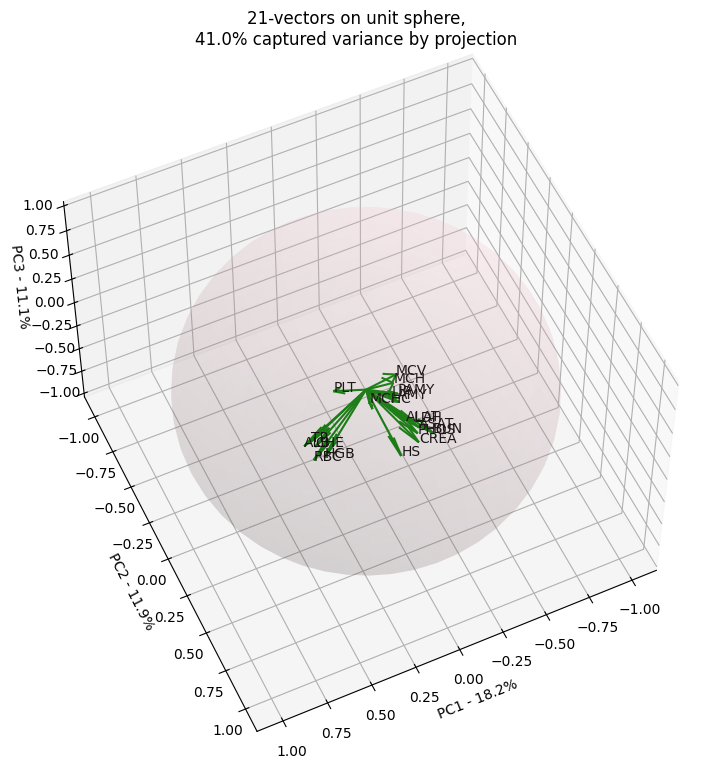

In [50]:
#sphere des correlations
fig = plt.figure(figsize=(9, 9))
#ax = fig.add_subplot(projection='3d')
ax = fig.add_subplot(111, projection='3d', elev=55, azim=65)
# draw sphere
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
# alpha controls opacity
ax.plot_surface(x, y, z, color="pink", alpha=0.1)


# a random array of 3D coordinates in [-1,1]

coef2 = np.transpose(pca2.components_)
# tails of the arrows
tails= np.zeros(len(coef2[1]))

# heads of the arrows with adjusted arrow head length
ax.quiver(tails,tails,tails,coef2[:,0], coef2[:,1], coef2[:,2], color='g')

ax.set_xlabel(f"PC1 - {100*pca_res2.explained_variance_ratio_[0]:.1f}%")
ax.set_ylabel(f"PC2 - {100*pca_res2.explained_variance_ratio_[1]:.1f}%")
ax.set_zlabel(f"PC3 - {100*pca_res2.explained_variance_ratio_[2]:.1f}%")
some_list = []
for r, i in enumerate(coef2): #rank, iterated
    if np.linalg.norm(i[:4]) > 0.3: #on inclue la 4eme PC
        ax.text(coef2[r,0], coef2[r,1], coef2[r,2], s=pca_frame2.columns[r])
        some_list.append((pca_frame2.columns[r], (np.round(coef2[r,0],2), np.round(coef2[r,1],2), np.round(coef2[r,2],2))))

ax.set_title(f'{len(coef2)}-vectors on unit sphere,\
\n{np.round(np.sum(pca_res2.explained_variance_ratio_[:3])*100)}% captured variance by projection');

In [46]:
some_list

[('AMY', (-0.1, 0.16, 0.08)),
 ('ASAT', (-0.15, 0.33, 0.0)),
 ('BUN', (-0.27, 0.23, -0.31)),
 ('ALAT', (-0.1, 0.26, 0.01)),
 ('MCH', (-0.02, 0.27, 0.48)),
 ('LDH', (-0.15, 0.26, -0.04)),
 ('LIP', (-0.08, 0.13, 0.09)),
 ('ALB', (0.42, 0.15, -0.06)),
 ('PAMY', (-0.11, 0.14, 0.09)),
 ('HGB', (0.38, 0.31, 0.04)),
 ('PLT', (0.11, -0.17, -0.2)),
 ('CREA', (-0.19, 0.24, -0.34)),
 ('RBC', (0.39, 0.2, -0.17)),
 ('TP', (0.36, 0.1, -0.13)),
 ('CHE', (0.37, 0.18, -0.05)),
 ('HS', (-0.06, 0.3, -0.29)),
 ('MCHC', (0.08, 0.22, 0.27)),
 ('MCV', (-0.07, 0.2, 0.41)),
 ('PHOS', (-0.19, 0.22, -0.26))]

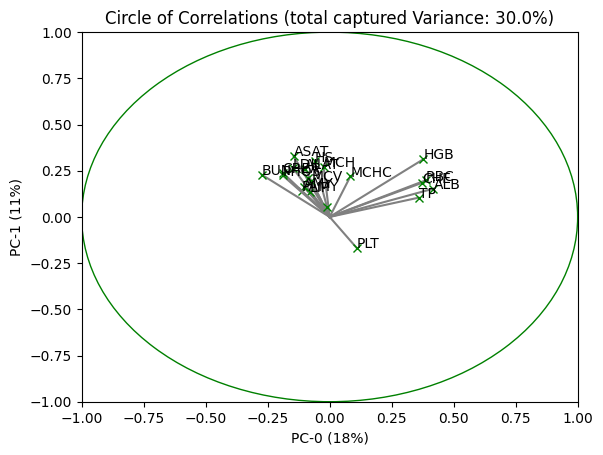

In [47]:
#df_norm = (df - df.mean()) / df.std()
# PCA
#pca = PCA(n_components='mle')

ebouli = pd.Series(pca2.explained_variance_ratio_)
	
# Circle of correlations
# http://stackoverflow.com/a/22996786/1565438

cols = ['PC-'+str(x) for x in range(len(ebouli))]
pc_infos = pd.DataFrame(coef2, columns=cols, index=pca_frame2.columns)

#def circleOfCorrelations(pc_infos, ebouli):
plt.Circle((0,0),radius=10, color='g', fill=False)
circle1=plt.Circle((0,0),radius=1, color='g', fill=False)
fig = plt.gcf()
fig.gca().add_artist(circle1)
for idx in range(pc_infos.shape[0]):
	x = pc_infos.loc[pc_infos.index[idx],"PC-0"]
	y = pc_infos.loc[pc_infos.index[idx],"PC-1"]
	plt.plot([0.0,x],[0.0,y],'-', c='grey')
	plt.plot(x, y, 'x', c='g')
	if np.linalg.norm(coef2[idx,:4]) > .3:
		plt.annotate(pc_infos.index[idx], xy=(x,y))
plt.xlabel("PC-0 (%s%%)" % str(ebouli[0])[:4].lstrip("0."))
plt.ylabel("PC-1 (%s%%)" % str(ebouli[1])[:4].lstrip("0."))
plt.xlim((-1,1))
plt.ylim((-1,1))
plt.title(f"Circle of Correlations (total captured Variance: {np.round(np.sum(ebouli[:2])*100)}%)");
#plt.savefig("circle_PCA_20.png")

In [ ]:
#pd.Series(liste_two, index=liste_one).sort_values(ascending= False)[:25].to_csv('liste25var.csv')

In [ ]:
#pca_df.to_csv('pca_bact.csv')

In [48]:
corr_df = frame.loc[:,liste_var].corr().style.background_gradient(cmap='coolwarm').format(precision=2)
corr_df

,AMY,ASAT,BUN,ALAT,MCH,LDH,LIP,ALB,PAMY,HGB,PLT,CREA,RBC,TP,CHE,HS,MPV,MCHC,MCV,PHOS,NEU
AMY,1.00,0.02,0.01,0.01,-0.01,0.02,0.81,-0.04,0.78,-0.01,0.05,0.01,-0.00,-0.04,-0.00,-0.00,0.01,-0.01,-0.01,0.02,0.02
ASAT,0.02,1.00,0.10,0.85,0.03,0.77,0.02,-0.08,0.00,0.01,-0.07,0.07,-0.01,-0.11,-0.05,0.11,0.07,-0.00,0.04,0.11,0.06
BUN,0.01,0.10,1.00,0.08,-0.01,0.14,0.02,-0.26,-0.00,-0.20,-0.12,0.68,-0.19,-0.17,-0.22,0.47,0.18,-0.13,0.07,0.44,0.15
ALAT,0.01,0.85,0.08,1.00,0.02,0.64,0.02,-0.06,0.00,0.01,-0.05,0.05,0.00,-0.09,-0.04,0.08,0.07,0.01,0.02,0.07,0.04
MCH,-0.01,0.03,-0.01,0.02,1.00,0.01,-0.00,-0.00,-0.01,0.18,-0.23,-0.03,-0.24,-0.07,-0.01,-0.00,0.17,0.53,0.87,-0.02,-0.04
LDH,0.02,0.77,0.14,0.64,0.01,1.00,0.01,-0.10,0.01,-0.03,-0.09,0.08,-0.03,-0.12,-0.06,0.12,0.07,-0.03,0.03,0.12,0.09
LIP,0.81,0.02,0.02,0.02,-0.00,0.01,1.00,-0.04,0.42,-0.01,0.05,0.01,-0.01,-0.03,-0.00,-0.00,0.02,0.00,-0.00,0.02,0.02
ALB,-0.04,-0.08,-0.26,-0.06,-0.00,-0.10,-0.04,1.00,-0.02,0.61,0.08,-0.07,0.60,0.77,0.71,0.10,-0.09,0.17,-0.10,-0.14,-0.15
PAMY,0.78,0.00,-0.00,0.00,-0.01,0.01,0.42,-0.02,1.00,-0.01,0.04,-0.00,-0.01,-0.01,-0.02,-0.01,0.01,-0.01,-0.01,-0.00,0.01
HGB,-0.01,0.01,-0.20,0.01,0.18,-0.03,-0.01,0.61,-0.01,1.00,-0.02,-0.10,0.90,0.48,0.57,0.11,0.06,0.33,0.03,-0.09,0.02


In [ ]:
from pandas.plotting import table 

plt.figure(figsize=(14, 14))
#fig.add_subplot()
ax = plt.subplot(frame_on=False ) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, frame.loc[:,liste_var].corr().round(2), loc='center');
#plt.savefig('corr_20x20.png')

In [ ]:
corr_df.shape

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
Z = linkage(data, 'ward')
# Plot title
plt.title('Hierarchical Clustering Dendrogram')
# Plot axis labels
plt.xlabel('sample index')
plt.ylabel('distance (Ward)')
# Make the dendrogram
dendrogram(Z, labels=table.index, leaf_rotation=90)